In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.regularizers import l1
from keras.layers.normalization import BatchNormalization
from keras import backend as K

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.stats import skew
from scipy.stats.stats import pearsonr

from sklearn.metrics import fbeta_score

from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

Using TensorFlow backend.
C:\Users\mbura\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\mbura\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\mbura\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\mbura\AppData\Roa

In [129]:
df = pd.read_csv("C:/Users/mbura/Desktop/iyzico/train.csv")
sub = pd.read_csv("C:/Users/mbura/Desktop/iyzico/test.csv")
sub = sub.set_index("ID")

In [130]:
df.ISFRAUD.value_counts()

0    157516
1      2484
Name: ISFRAUD, dtype: int64

In [131]:
scale_pos_weight = np.sqrt(157516/2484) 
scale_pos_weight

7.963180164060198

In [132]:
100*2484/(157516+2484)

1.5525

## Class imbalance

In [140]:
df.head()

,BASKETPAIDPRICE,BASKETINSTALLMENT,BASKETPAYMENTCHANNEL,BASKETPAYMENTSOURCETYPE,BASKETISTHREEDS,BASKETREGISTERCARD,BASKETHASVIRTUALITEM,CARDTYPE,CARDASSOCIATION,EMAIL,CARDBANKID,MERCHANT_ID,ISFRAUD
0,0.220099,1,9,1,1,0,0,1,1,1403000,7,6679,0
1,-0.173116,1,1,1,1,0,1,1,1,902058,7,8220,0
2,-0.228070,1,9,1,0,0,0,1,1,1454563,0,4698,0
3,-0.098923,1,2,1,0,0,0,1,2,1708531,7,28,0
4,-0.059801,3,1,3,1,0,0,1,1,1832048,4,694,0


In [137]:
sub.head()

,BASKETPAIDPRICE,BASKETINSTALLMENT,BASKETPAYMENTCHANNEL,BASKETPAYMENTSOURCETYPE,BASKETISTHREEDS,BASKETREGISTERCARD,BASKETHASVIRTUALITEM,CARDTYPE,CARDASSOCIATION,EMAIL,CARDBANKID,MERCHANT_ID
ID,,,,,,,,,,,,
0,-0.030406,1,9,1,0,0,1,1,2,95248,8,163
1,-0.261830,1,9,1,0,0,1,2,1,1123807,15,6945
2,0.135299,1,4,3,0,0,0,1,1,878540,7,1232
3,-0.002224,1,1,1,0,0,1,1,1,755894,8,1733
4,-0.197247,1,9,1,0,0,1,1,2,1123807,9,6945


In [134]:
for col in list(df.columns):
    print(col+" :\n")
    print(df[col].value_counts())
    print("\n")


BASKETPAIDPRICE :

-0.263298    5926
-0.261341    4769
-0.255469    3131
-0.216348    2839
-0.245684    1933
             ... 
 0.230863       1
 0.244758       1
 0.810782       1
-0.001735       1
 1.645748       1
Name: BASKETPAIDPRICE, Length: 24714, dtype: int64


BASKETINSTALLMENT :

1     144271
3      10729
2       2557
6       1685
9        566
12       113
4         39
8         27
5         11
7          2
Name: BASKETINSTALLMENT, dtype: int64


BASKETPAYMENTCHANNEL :

9    56246
1    49799
2    22535
5    17348
4    12809
6      843
3      420
Name: BASKETPAYMENTCHANNEL, dtype: int64


BASKETPAYMENTSOURCETYPE :

1    132493
3     26756
4       449
2       302
Name: BASKETPAYMENTSOURCETYPE, dtype: int64


BASKETISTHREEDS :

0    102215
1     57785
Name: BASKETISTHREEDS, dtype: int64


BASKETREGISTERCARD :

0    160000
Name: BASKETREGISTERCARD, dtype: int64


BASKETHASVIRTUALITEM :

0    94025
1    65975
Name: BASKETHASVIRTUALITEM, dtype: int64


CARDTYPE :

1    111115
2    

In [135]:
for col in list(sub.columns):
    print(col+" :\n")
    print(sub[col].value_counts())
    print("\n")


BASKETPAIDPRICE :

-0.263298    1436
-0.261341    1198
-0.255469     780
-0.216348     758
-0.245684     486
             ... 
 9.320287       1
 0.018071       1
 5.304278       1
-0.191591       1
 0.066841       1
Name: BASKETPAIDPRICE, Length: 10146, dtype: int64


BASKETINSTALLMENT :

1     36038
3      2685
2       697
6       407
9       134
12       28
8         5
4         5
5         1
Name: BASKETINSTALLMENT, dtype: int64


BASKETPAYMENTCHANNEL :

9    14063
1    12454
2     5771
5     4251
4     3174
6      199
3       88
Name: BASKETPAYMENTCHANNEL, dtype: int64


BASKETPAYMENTSOURCETYPE :

1    33218
3     6581
4      135
2       66
Name: BASKETPAYMENTSOURCETYPE, dtype: int64


BASKETISTHREEDS :

0    25588
1    14412
Name: BASKETISTHREEDS, dtype: int64


BASKETREGISTERCARD :

0    40000
Name: BASKETREGISTERCARD, dtype: int64


BASKETHASVIRTUALITEM :

0    23436
1    16564
Name: BASKETHASVIRTUALITEM, dtype: int64


CARDTYPE :

1    27802
2    12198
Name: CARDTYPE, dtype: i

## Training

In [141]:
X_train.BASKETPAIDPRICE

9148      0.003453
3327      0.002248
5999      0.000128
89838     0.000203
31242     0.000511
            ...   
37454     0.000010
40872     0.000008
67698     0.000153
131631    0.000122
82781     0.000020
Name: BASKETPAIDPRICE, Length: 128000, dtype: float64

In [142]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["ISFRAUD"]), df['ISFRAUD'], test_size=0.2)


In [143]:
# Rescale data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train.BASKETPAIDPRICE = scaler.fit_transform(X_train.BASKETPAIDPRICE.values.reshape(-1, 1))
X_test.BASKETPAIDPRICE = scaler.fit_transform(X_test.BASKETPAIDPRICE.values.reshape(-1, 1))
sub.BASKETPAIDPRICE = scaler.fit_transform(sub.BASKETPAIDPRICE.values.reshape(-1, 1))



In [145]:
max(X_train.BASKETPAIDPRICE), max(X_test.BASKETPAIDPRICE)

(184.1160394019869, 89.15859943107476)

In [146]:
import lightgbm as lgb

print('Loading data...')
# load or create your dataset

# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# specify your configurations as a dict
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'auc',
    'num_leaves': 31,
    'n_estimators' : 200,
    'learning_rate': 0.1,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=5000,
                valid_sets=lgb_eval,
                early_stopping_rounds=500)

print('Saving model...')
# save model to file
#gbm.save_model('model.txt')

print('Starting predicting...')
# predict
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)


Loading data...
Starting training...
[1]	valid_0's auc: 0.849648
Training until validation scores don't improve for 500 rounds.
[2]	valid_0's auc: 0.91752
[3]	valid_0's auc: 0.920257
[4]	valid_0's auc: 0.930202
[5]	valid_0's auc: 0.931487
[6]	valid_0's auc: 0.933977
[7]	valid_0's auc: 0.934982

c:\users\mbura\appdata\local\programs\python\python36\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



[8]	valid_0's auc: 0.935469
[9]	valid_0's auc: 0.936899
[10]	valid_0's auc: 0.936749
[11]	valid_0's auc: 0.938715
[12]	valid_0's auc: 0.938787
[13]	valid_0's auc: 0.940588
[14]	valid_0's auc: 0.940088
[15]	valid_0's auc: 0.939689
[16]	valid_0's auc: 0.939688
[17]	valid_0's auc: 0.939642
[18]	valid_0's auc: 0.939535
[19]	valid_0's auc: 0.93926
[20]	valid_0's auc: 0.93867
[21]	valid_0's auc: 0.938472
[22]	valid_0's auc: 0.937758
[23]	valid_0's auc: 0.937621
[24]	valid_0's auc: 0.938418
[25]	valid_0's auc: 0.938417
[26]	valid_0's auc: 0.938571
[27]	valid_0's auc: 0.938318
[28]	valid_0's auc: 0.938164
[29]	valid_0's auc: 0.938121
[30]	valid_0's auc: 0.938064
[31]	valid_0's auc: 0.938238
[32]	valid_0's auc: 0.937884
[33]	valid_0's auc: 0.938059
[34]	valid_0's auc: 0.937574
[35]	valid_0's auc: 0.937648
[36]	valid_0's auc: 0.938061
[37]	valid_0's auc: 0.938053
[38]	valid_0's auc: 0.93735
[39]	valid_0's auc: 0.937907
[40]	valid_0's auc: 0.937937
[41]	valid_0's auc: 0.93787
[42]	valid_0's auc:

In [147]:
fbeta_sklearn = fbeta_score(y_test, y_pred.round(), beta=2)
fbeta_sklearn

0.49502899751449875

In [148]:
y_pred[y_pred>0.205].shape, y_test[y_test>0.13].shape

((459,), (531,))

In [149]:
y_pred[y_pred>0.205] = 1

In [150]:
y_pred[y_pred<0.205] = 0

In [168]:
fbeta_sklearn = fbeta_score(y_test, y_pred, beta=2)
fbeta_sklearn

0.5749128919860627

In [152]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

In [153]:
cm

array([[31307,   162],
       [  234,   297]], dtype=int64)

In [154]:
from sklearn.metrics import roc_auc_score 

In [155]:
roc_auc_score(y_test, y_pred)


0.7770870552725819

In [156]:
#Import modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc

# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

#Define 'y' labels
train_y = y_train
test_y = y_test

#Define 'x' sets
train_x = X_train
test_x = X_test

#Select Hyper-Parameters
params = {'boosting_type': 'gbdt',
          'max_depth' : -1,
          'objective': 'binary',
          'nthread': -1,
          'num_leaves': 64,
          'learning_rate': 0.07,
          'max_bin': 512,
          'subsample_for_bin': 200,
          'subsample': 1,
          'subsample_freq': 1,
          'colsample_bytree': 0.8,
          'reg_alpha': 1.2,
          'reg_lambda': 1.2,
          'min_split_gain': 0.5,
          'min_child_weight': 1,
          'min_child_samples': 5,
          'scale_pos_weight': scale_pos_weight,
          'num_class' : 1,
          'metric' : 'auc'
          }

gridParams = {
    'learning_rate': [0.07,0.1,0.05],
    'n_estimators': [8,16,64,128],
    'num_leaves': [20, 24, 27,32],
    'boosting_type' : ['gbdt'],
    'objective' : ['binary'],
    'random_state' : [501], 
    'colsample_bytree' : [0.64, 0.65],
    'subsample' : [0.7,0.75]
    }

mdl = lgb.LGBMClassifier(boosting_type= 'gbdt',
          objective = 'binary',
          n_jobs = 5, 
          silent = True,
          max_depth = params['max_depth'],
          max_bin = params['max_bin'],
          subsample_for_bin = params['subsample_for_bin'],
          subsample = params['subsample'],
          subsample_freq = params['subsample_freq'],
          min_split_gain = params['min_split_gain'],
          min_child_weight = params['min_child_weight'],
          min_child_samples = params['min_child_samples'],
          scale_pos_weight = params['scale_pos_weight'])

mdl.get_params().keys()

grid = GridSearchCV(mdl, gridParams, verbose=2, cv=4, n_jobs=-1)
grid.fit(train_x, train_y)

print(grid.best_params_)
print(grid.best_score_)

params['colsample_bytree'] = grid.best_params_['colsample_bytree']
params['learning_rate'] = grid.best_params_['learning_rate']
params['num_leaves'] = grid.best_params_['num_leaves']
params['subsample'] = grid.best_params_['subsample']

Fitting 4 folds for each of 192 candidates, totalling 768 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   34.8s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 768 out of 768 | elapsed:  2.9min finished


{'boosting_type': 'gbdt', 'colsample_bytree': 0.64, 'learning_rate': 0.05, 'n_estimators': 16, 'num_leaves': 27, 'objective': 'binary', 'random_state': 501, 'subsample': 0.75}
0.9890859375


In [157]:
print('Fitting with params: ')
print(params)

Fitting with params: 
{'boosting_type': 'gbdt', 'max_depth': -1, 'objective': 'binary', 'nthread': -1, 'num_leaves': 27, 'learning_rate': 0.05, 'max_bin': 512, 'subsample_for_bin': 200, 'subsample': 0.75, 'subsample_freq': 1, 'colsample_bytree': 0.64, 'reg_alpha': 1.2, 'reg_lambda': 1.2, 'min_split_gain': 0.5, 'min_child_weight': 1, 'min_child_samples': 5, 'scale_pos_weight': 7.963180164060198, 'num_class': 1, 'metric': 'auc'}


In [158]:
lgbm = lgb.train(params,
                 lgb_train,
                 
                 10,
                 lgb_eval,
                 early_stopping_rounds= 100,
                 verbose_eval= 4
                 )

Training until validation scores don't improve for 100 rounds.
[4]	valid_0's auc: 0.923137
[8]	valid_0's auc: 0.93055
Did not meet early stopping. Best iteration is:
[9]	valid_0's auc: 0.931906


Overall accuracy of Light GBM model: 0.97928125


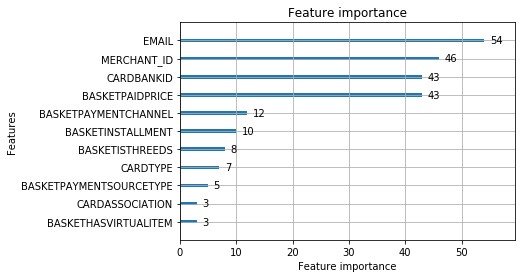

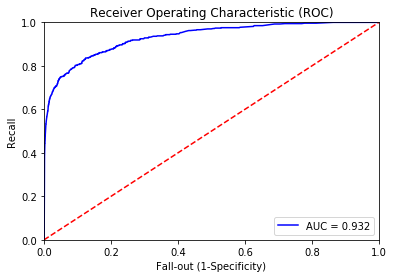

AUC score: 0.9319061134447383
FBeta score: 0.5763983628922238


<Figure size 432x288 with 0 Axes>

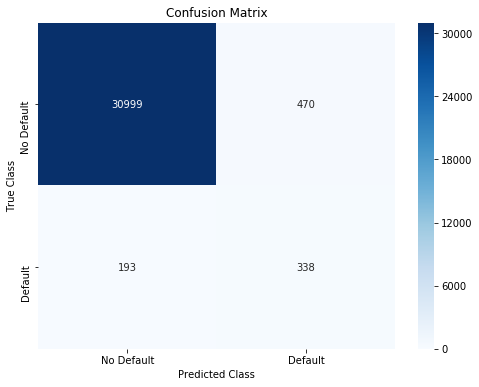

In [170]:
#Predict on test set
predictions_lgbm_prob = lgbm.predict(test_x)
predictions_lgbm_01 = np.where(predictions_lgbm_prob > 0.15, 1, 0) #Turn probability to 0-1 binary output

#--------------------------Print accuracy measures and variable importances----------------------
#Plot Variable Importances
lgb.plot_importance(lgbm, max_num_features=21, importance_type='split')

#Print accuracy
acc_lgbm = accuracy_score(test_y,predictions_lgbm_01)
print('Overall accuracy of Light GBM model:', acc_lgbm)

#Print Area Under Curve
plt.figure()
false_positive_rate, recall, thresholds = roc_curve(test_y, predictions_lgbm_prob)
roc_auc = auc(false_positive_rate, recall)
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.show()

print('AUC score:', roc_auc)
print('FBeta score:', fbeta_score(test_y, predictions_lgbm_01, beta=2))


#Print Confusion Matrix
plt.figure()
cm = confusion_matrix(test_y, predictions_lgbm_01)
labels = ['No Default', 'Default']
plt.figure(figsize=(8,6))
sns.heatmap(cm, xticklabels = labels, yticklabels = labels, annot = True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

## Catboost

In [160]:
# Create CatBoost as Model
from catboost import Pool, CatBoostClassifier

model = CatBoostClassifier(loss_function= "Logloss", 
                             eval_metric= "AUC", 
                             task_type= "GPU",
                             learning_rate = 0.1, 
                             iterations = 200, 
                             l2_leaf_reg = 4,
                             random_seed= 42, 
                             od_type="Iter",
                             depth= 12, 
                             silent = False)

In [161]:
# fit model
from sklearn.metrics import roc_auc_score

model.fit(X_train, y_train)

0:	learn: 0.7635989	total: 20.3ms	remaining: 4.04s
1:	learn: 0.7955855	total: 37.1ms	remaining: 3.67s
2:	learn: 0.9000390	total: 106ms	remaining: 6.97s
3:	learn: 0.9057205	total: 126ms	remaining: 6.2s
4:	learn: 0.9147517	total: 190ms	remaining: 7.39s
5:	learn: 0.9217396	total: 257ms	remaining: 8.32s
6:	learn: 0.9228734	total: 317ms	remaining: 8.75s
7:	learn: 0.9234236	total: 373ms	remaining: 8.96s
8:	learn: 0.9247951	total: 430ms	remaining: 9.12s
9:	learn: 0.9269194	total: 486ms	remaining: 9.23s
10:	learn: 0.9333856	total: 543ms	remaining: 9.34s
11:	learn: 0.9346024	total: 596ms	remaining: 9.33s
12:	learn: 0.9407453	total: 649ms	remaining: 9.33s
13:	learn: 0.9425103	total: 704ms	remaining: 9.35s
14:	learn: 0.9437014	total: 755ms	remaining: 9.31s
15:	learn: 0.9451961	total: 808ms	remaining: 9.29s
16:	learn: 0.9470233	total: 861ms	remaining: 9.27s
17:	learn: 0.9481416	total: 915ms	remaining: 9.25s
18:	learn: 0.9497065	total: 975ms	remaining: 9.29s
19:	learn: 0.9501005	total: 1.03s	remain

In [162]:
pred = model.predict(test_x)
auc_score = roc_auc_score(test_y, pred)
print("AUC Score (Test): ", auc_score)

AUC Score (Test):  0.7450318338574794


In [167]:
fbeta_sklearn = fbeta_score(test_y, pred, beta=2)
fbeta_sklearn

0.5368161250514192

In [164]:
sum(pred)

307.0

## Submission

In [66]:
sub = pd.read_csv("C:/Users/mbura/Desktop/iyzico/test.csv")
sub = sub.set_index("ID")

In [183]:
sub

,BASKETPAIDPRICE,BASKETINSTALLMENT,BASKETPAYMENTCHANNEL,BASKETPAYMENTSOURCETYPE,BASKETISTHREEDS,BASKETREGISTERCARD,BASKETHASVIRTUALITEM,CARDTYPE,CARDASSOCIATION,EMAIL,CARDBANKID,MERCHANT_ID
ID,,,,,,,,,,,,
0,-0.030262,1,9,1,0,0,1,1,2,95248,8,163
1,-0.294324,1,9,1,0,0,1,2,1,1123807,15,6945
2,0.158812,1,4,3,0,0,0,1,1,878540,7,1232
3,0.001894,1,1,1,0,0,1,1,1,755894,8,1733
4,-0.220632,1,9,1,0,0,1,1,2,1123807,9,6945
...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0.036707,3,1,3,1,0,0,1,2,452624,12,694
39996,0.127415,1,1,1,1,0,1,1,1,822951,7,1733
39997,-0.015301,1,1,1,0,0,0,1,1,1103635,7,31


In [190]:
predictions_lgbm_01 = lgbm.predict(sub)


In [191]:
predictions_lgbm_01 = np.where(predictions_lgbm_01 > 0.15, 1, 0) #Turn probability to 0-1 binary output
predictions_lgbm_01

array([0, 0, 0, ..., 0, 0, 0])

In [192]:
sum(predictions_lgbm_01)

1217

In [193]:
sum(predictions_lgbm_01)/len(predictions_lgbm_01)*100

3.0425

In [194]:
subFinal = pd.read_csv("C:/Users/mbura/Desktop/iyzico/samplesubmission.csv")

In [195]:
len(predictions_lgbm_01)

40000

In [196]:
subFinal.ISFRAUD = predictions_lgbm_01
subFinal.ISFRAUD = subFinal.ISFRAUD.astype(int)

In [197]:
subFinal.ISFRAUD.value_counts()

0    38783
1     1217
Name: ISFRAUD, dtype: int64

In [198]:
subFinal.to_csv("C:/Users/mbura/Desktop/iyzico/samplesubmission.csv", index = False)